In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

print("Libraries imported successfully")


Libraries imported successfully


In [ ]:
file_path = "Consolidated.xlsx"

data = pd.read_excel(file_path)

print("Dataset Loaded Successfully")
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])



Dataset Loaded Successfully
Rows: 500000
Columns: 6


In [ ]:
# View dataset structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          500000 non-null  datetime64[ns]
 1   state         500000 non-null  object        
 2   district      500000 non-null  object        
 3   pincode       500000 non-null  int64         
 4   bio_age_5_17  500000 non-null  int64         
 5   bio_age_17_   500000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 22.9+ MB


In [ ]:
# Check for missing values
data.isnull().sum()


,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


In [ ]:
# Check duplicate rows
print("Duplicate Rows:", data.duplicated().sum())


Duplicate Rows: 10318


In [ ]:
# Remove duplicates
data = data.drop_duplicates()

print("Rows after removing duplicates:", data.shape[0])


Rows after removing duplicates: 489682


In [ ]:
# Create additional time columns
data['Year'] = data['date'].dt.year
data['Month'] = data['date'].dt.month
data['Day'] = data['date'].dt.day

In [ ]:
# Create aggregated updates column
data['Total Updates'] = data['bio_age_5_17'] + data['bio_age_17_']


In [ ]:
# Rename columns for clarity
data = data.rename(columns={
    'date': 'Date',
    'state': 'State',
    'district': 'District',
    'pincode': 'Pincode',
    'bio_age_5_17': '5 to 17 Years of Age',
    'bio_age_17_': '17+ Years of Age'
})

print("Columns renamed successfully!")
print(data.columns)


Columns renamed successfully!
Index(['Date', 'State', 'District', 'Pincode', '5 to 17 Years of Age',
       '17+ Years of Age', 'Year', 'Month', 'Day', 'Total Updates'],
      dtype='object')


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 489682 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  489682 non-null  datetime64[ns]
 1   State                 489682 non-null  object        
 2   District              489682 non-null  object        
 3   Pincode               489682 non-null  int64         
 4   5 to 17 Years of Age  489682 non-null  int64         
 5   17+ Years of Age      489682 non-null  int64         
 6   Year                  489682 non-null  int32         
 7   Month                 489682 non-null  int32         
 8   Day                   489682 non-null  int32         
 9   Total Updates         489682 non-null  int64         
dtypes: datetime64[ns](1), int32(3), int64(4), object(2)
memory usage: 35.5+ MB


In [ ]:
# Basic statistical summary
data.describe()


,Date,Pincode,5 to 17 Years of Age,17+ Years of Age,Year,Month,Day,Total Updates
count,489682,489682.000000,489682.000000,489682.000000,489682.0,489682.000000,489682.000000,489682.000000
mean,2025-08-11 15:37:41.400663808,521908.931121,47.847934,51.370677,2025.0,8.105558,8.111162,99.218611
min,2025-03-01 00:00:00,110001.000000,0.000000,0.000000,2025.0,3.000000,1.000000,0.000000
25%,2025-09-01 00:00:00,389170.000000,1.000000,2.000000,2025.0,9.000000,1.000000,3.000000
50%,2025-09-08 00:00:00,522412.000000,5.000000,6.000000,2025.0,9.000000,8.000000,11.000000
75%,2025-09-13 00:00:00,690514.000000,26.000000,24.000000,2025.0,9.000000,13.000000,53.000000
max,2025-09-19 00:00:00,855456.000000,8002.000000,7625.000000,2025.0,9.000000,19.000000,13381.000000
std,NaN,199463.035870,157.534164,165.971424,0.0,1.794572,6.216864,305.122737


In [ ]:
print("Total Aadhaar Updates Recorded in 2025:")
print(data['Total Updates'].sum())


Total Aadhaar Updates Recorded in 2025:
48585568


In [ ]:
age_summary = data[['5 to 17 Years of Age', '17+ Years of Age']].sum()

print("Updates by Age Group:")
print(age_summary)


Updates by Age Group:
5 to 17 Years of Age    23430272
17+ Years of Age        25155296
dtype: int64


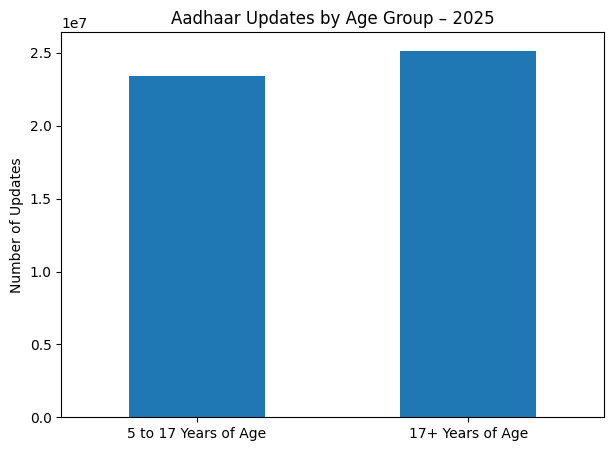

In [ ]:
plt.figure(figsize=(7,5))
age_summary.plot(kind='bar')
plt.title("Aadhaar Updates by Age Group – 2025")
plt.ylabel("Number of Updates")
plt.xticks(rotation=0)
plt.show()


In [ ]:
state_summary = data.groupby('State')['Total Updates'].sum().sort_values(ascending=False)

print("Top 10 States by Updates:")
print(state_summary.head(10))


Top 10 States by Updates:
State
Uttar Pradesh     6643629
Maharashtra       6002738
Madhya Pradesh    4601265
Bihar             3543433
Tamil Nadu        3026489
Rajasthan         2844034
Andhra Pradesh    2557498
Gujarat           2455187
Karnataka         1872814
West Bengal       1776798
Name: Total Updates, dtype: int64


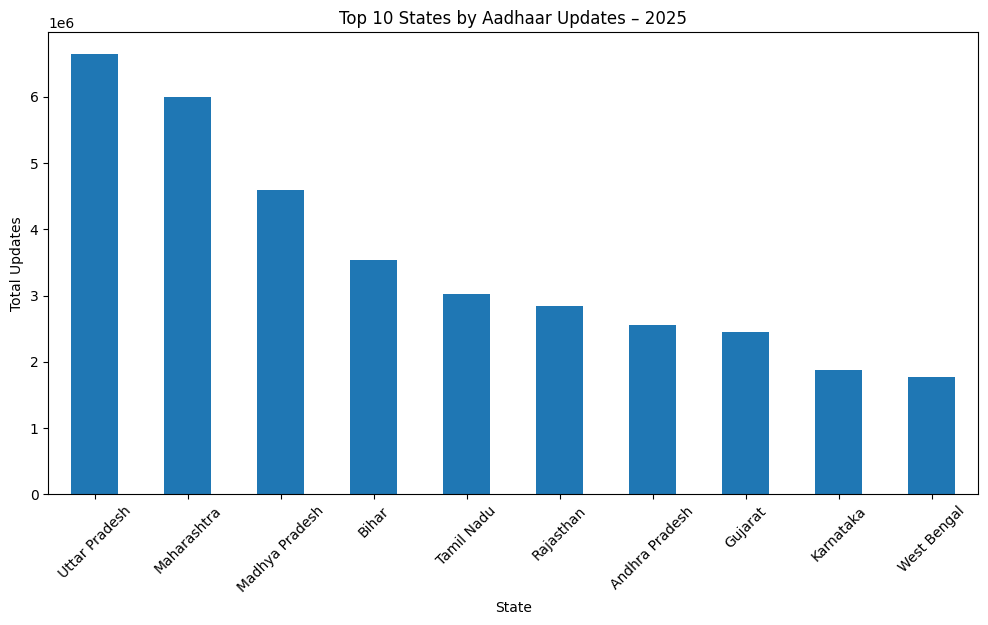

In [ ]:
plt.figure(figsize=(12,6))
state_summary.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Updates – 2025")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.show()


In [ ]:
month_summary = data.groupby('Month')['Total Updates'].sum()

print(month_summary)


Month
3    8322222
4    8641679
5    7879956
6    7899289
7    9792552
9    6049870
Name: Total Updates, dtype: int64


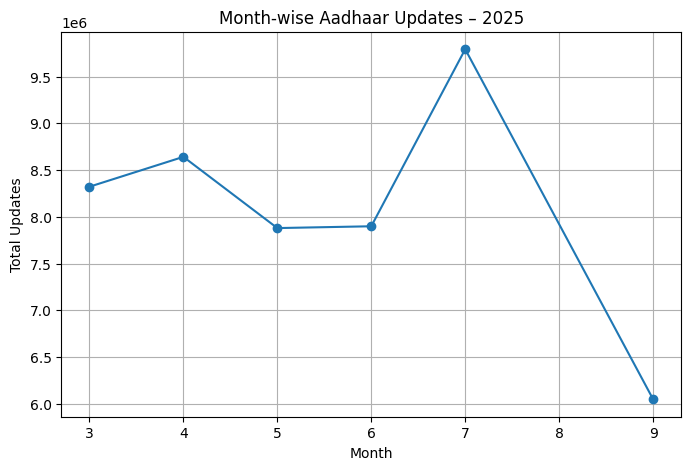

In [ ]:
plt.figure(figsize=(8,5))
month_summary.plot(kind='line', marker='o')
plt.title("Month-wise Aadhaar Updates – 2025")
plt.ylabel("Total Updates")
plt.xlabel("Month")
plt.grid()
plt.show()


In [ ]:
district_summary = data.groupby('District')['Total Updates'].sum().sort_values(ascending=False)

print("Top 10 Districts by Updates:")
print(district_summary.head(10))


Top 10 Districts by Updates:
District
Pune                401271
Nashik              370277
Thane               355678
Ahmedabad           312460
Jalgaon             278886
Aurangabad          273447
Mumbai              255617
North West Delhi    255510
Jaipur              253468
Kurnool             249235
Name: Total Updates, dtype: int64


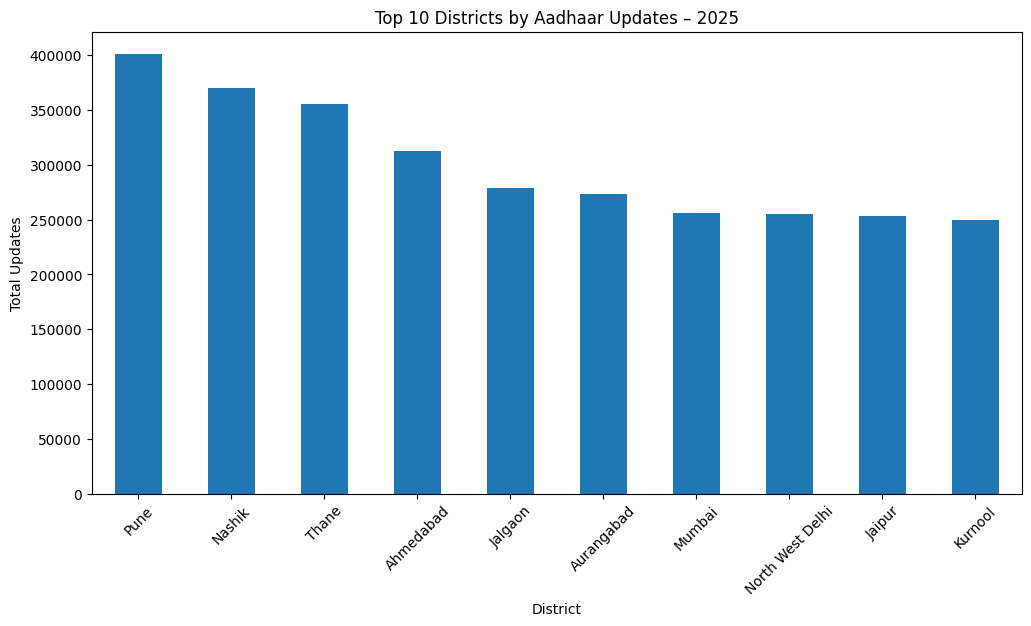

In [ ]:
plt.figure(figsize=(12,6))
district_summary.head(10).plot(kind='bar')
plt.title("Top 10 Districts by Aadhaar Updates – 2025")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.show()


In [ ]:
state_age = data.groupby('State')[['5 to 17 Years of Age', '17+ Years of Age']].sum()

print("State vs Age Group Updates (Sample):")
print(state_age.head())


State vs Age Group Updates (Sample):
                             5 to 17 Years of Age  17+ Years of Age
State                                                              
Andaman & Nicobar Islands                     175              1179
Andaman and Nicobar Islands                  7628              5629
Andhra Pradesh                            1580665            976833
Arunachal Pradesh                           23119             23488
Assam                                      370206            204182


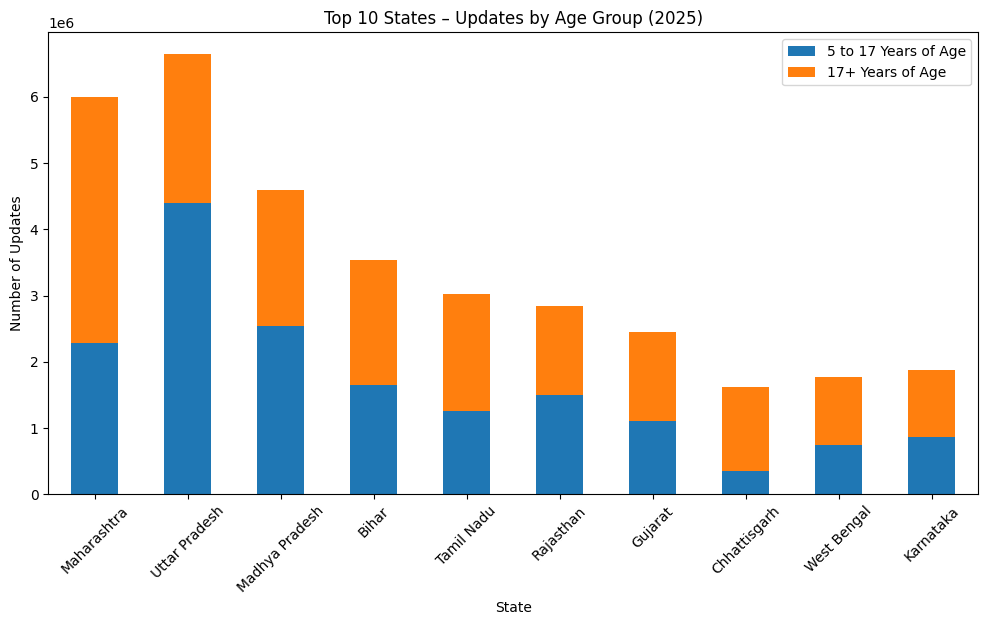

In [ ]:
state_age.sort_values(by='17+ Years of Age', ascending=False).head(10).plot(
    kind='bar', stacked=True, figsize=(12,6))

plt.title("Top 10 States – Updates by Age Group (2025)")
plt.ylabel("Number of Updates")
plt.xticks(rotation=45)
plt.show()


In [ ]:
month_total = data.groupby('Month')['Total Updates'].sum()

print("Month-wise Total Updates:")
print(month_total)


Month-wise Total Updates:
Month
3    8322222
4    8641679
5    7879956
6    7899289
7    9792552
9    6049870
Name: Total Updates, dtype: int64


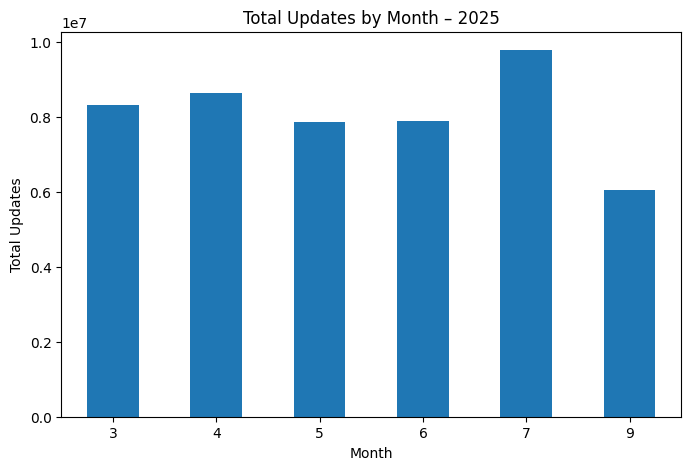

In [ ]:
plt.figure(figsize=(8,5))
month_total.plot(kind='bar')
plt.title("Total Updates by Month – 2025")
plt.ylabel("Total Updates")
plt.xlabel("Month")
plt.xticks(rotation=0)
plt.show()


In [ ]:
month_age = data.groupby('Month')[['5 to 17 Years of Age', '17+ Years of Age']].sum()

print(month_age)


       5 to 17 Years of Age  17+ Years of Age
Month                                        
3                   3733578           4588644
4                   4356896           4284783
5                   3868247           4011709
6                   3710149           4189140
7                   4499057           5293495
9                   3262345           2787525


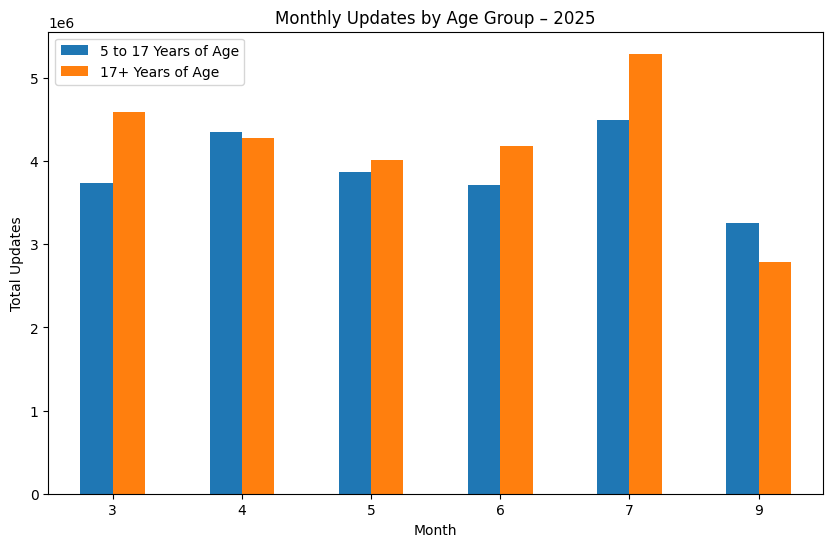

In [ ]:
month_age.plot(kind='bar', figsize=(10,6))
plt.title("Monthly Updates by Age Group – 2025")
plt.ylabel("Total Updates")
plt.xticks(rotation=0)
plt.show()


In [ ]:
state_avg = data.groupby('State')['Total Updates'].mean().sort_values(ascending=False)

print("Average Updates per Record by State:")
print(state_avg.head(10))


Average Updates per Record by State:
State
Delhi                     405.682802
Madhya Pradesh            249.013151
Dadra and Nagar Haveli    230.612903
Chhattisgarh              197.432972
Haryana                   165.446223
Bihar                     158.948235
Jharkhand                 158.527077
Uttar Pradesh             157.234492
Maharashtra               152.257146
Chandigarh                135.561555
Name: Total Updates, dtype: float64


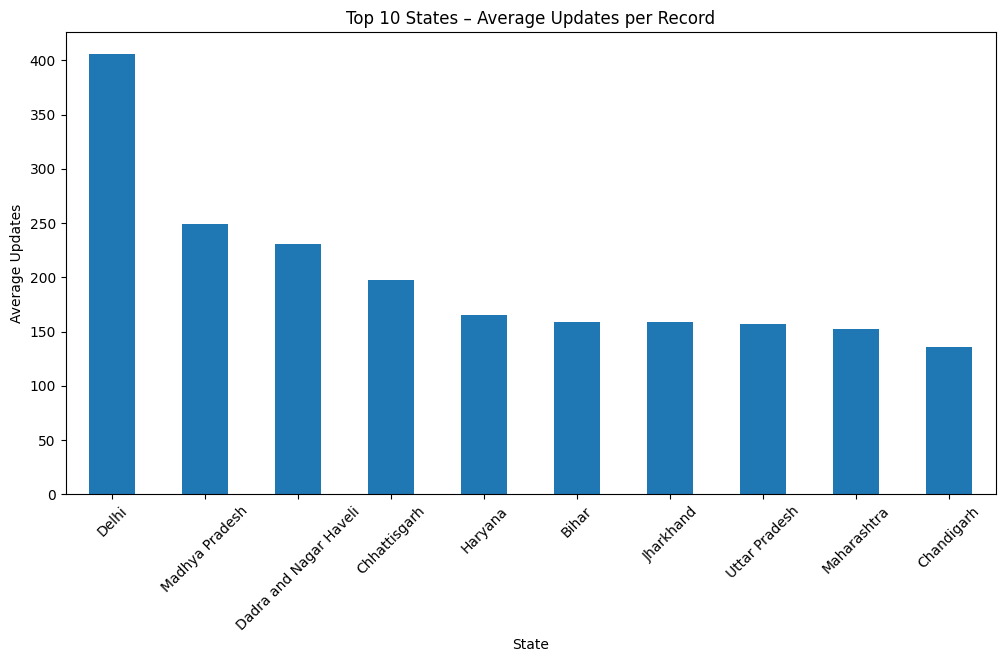

In [ ]:
plt.figure(figsize=(12,6))
state_avg.head(10).plot(kind='bar')
plt.title("Top 10 States – Average Updates per Record")
plt.ylabel("Average Updates")
plt.xticks(rotation=45)
plt.show()


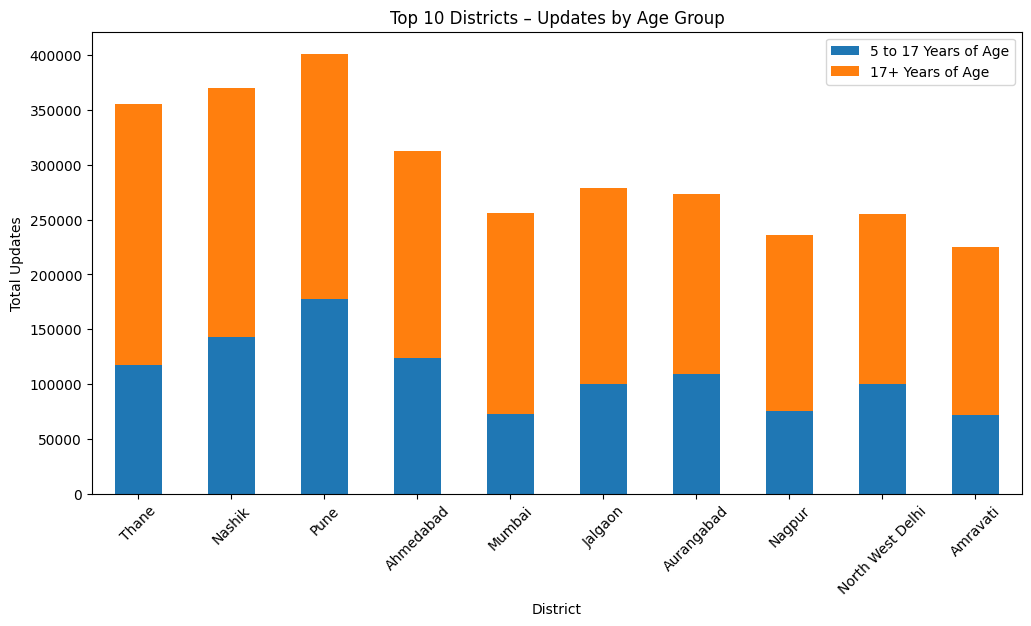

In [ ]:
district_age = data.groupby('District')[['5 to 17 Years of Age', '17+ Years of Age']].sum()

district_age.sort_values(by='17+ Years of Age', ascending=False).head(10).plot(
    kind='bar', stacked=True, figsize=(12,6))

plt.title("Top 10 Districts – Updates by Age Group")
plt.ylabel("Total Updates")
plt.xticks(rotation=45)
plt.show()


In [ ]:
state_month = data.pivot_table(
    values='Total Updates',
    index='State',
    columns='Month',
    aggfunc='sum'
)

print(state_month.head())


Month                               3         4         5         6         7  \
State                                                                           
Andaman & Nicobar Islands       209.0     184.0     180.0     140.0     259.0   
Andaman and Nicobar Islands    2494.0    2560.0    1715.0    1804.0    2569.0   
Andhra Pradesh               403296.0  608589.0  500660.0  508472.0  334226.0   
Arunachal Pradesh              7400.0    8375.0    8305.0    7138.0    8442.0   
Assam                         92931.0  139659.0   83841.0   71576.0   95172.0   

Month                               9  
State                                  
Andaman & Nicobar Islands       382.0  
Andaman and Nicobar Islands    2115.0  
Andhra Pradesh               202255.0  
Arunachal Pradesh              6947.0  
Assam                         91209.0  


In [ ]:
state_month = data.pivot_table(
    values='Total Updates',
    index='State',
    columns='Month',
    aggfunc='sum'
)

print(state_month.head())


Month                               3         4         5         6         7  \
State                                                                           
Andaman & Nicobar Islands       209.0     184.0     180.0     140.0     259.0   
Andaman and Nicobar Islands    2494.0    2560.0    1715.0    1804.0    2569.0   
Andhra Pradesh               403296.0  608589.0  500660.0  508472.0  334226.0   
Arunachal Pradesh              7400.0    8375.0    8305.0    7138.0    8442.0   
Assam                         92931.0  139659.0   83841.0   71576.0   95172.0   

Month                               9  
State                                  
Andaman & Nicobar Islands       382.0  
Andaman and Nicobar Islands    2115.0  
Andhra Pradesh               202255.0  
Arunachal Pradesh              6947.0  
Assam                         91209.0  


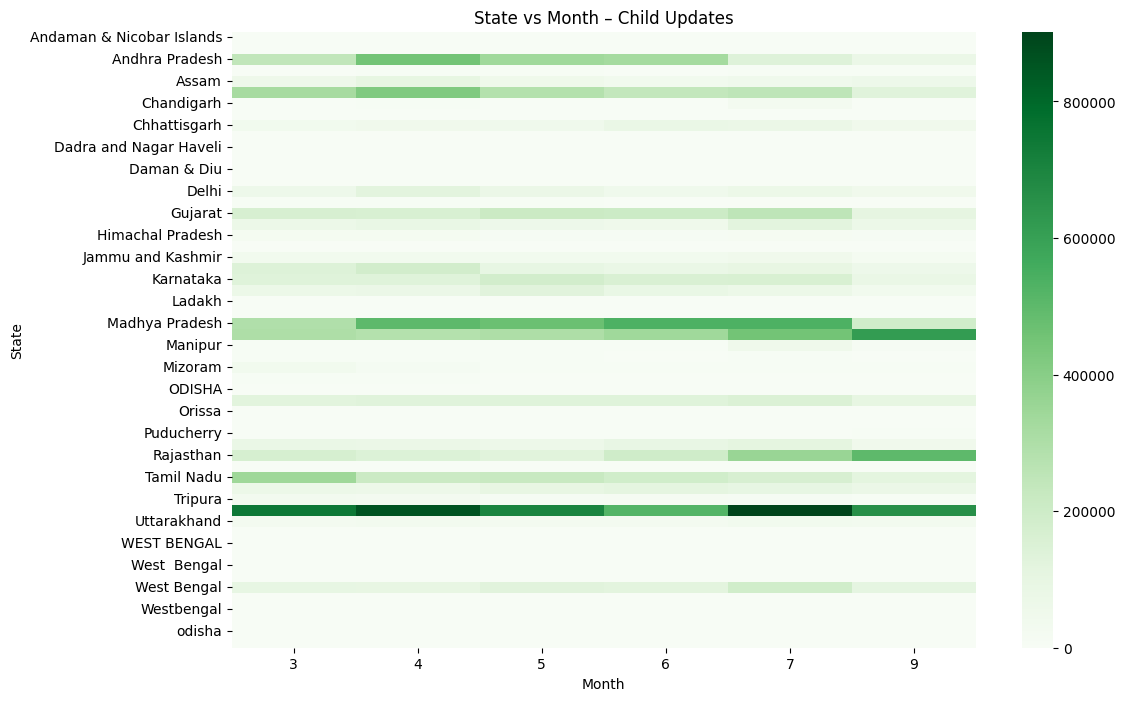

In [ ]:
state_month_child = data.pivot_table(
    values='5 to 17 Years of Age',
    index='State',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(12,8))
sns.heatmap(state_month_child.fillna(0), cmap='Greens')

plt.title("State vs Month – Child Updates")
plt.ylabel("State")
plt.xlabel("Month")
plt.show()


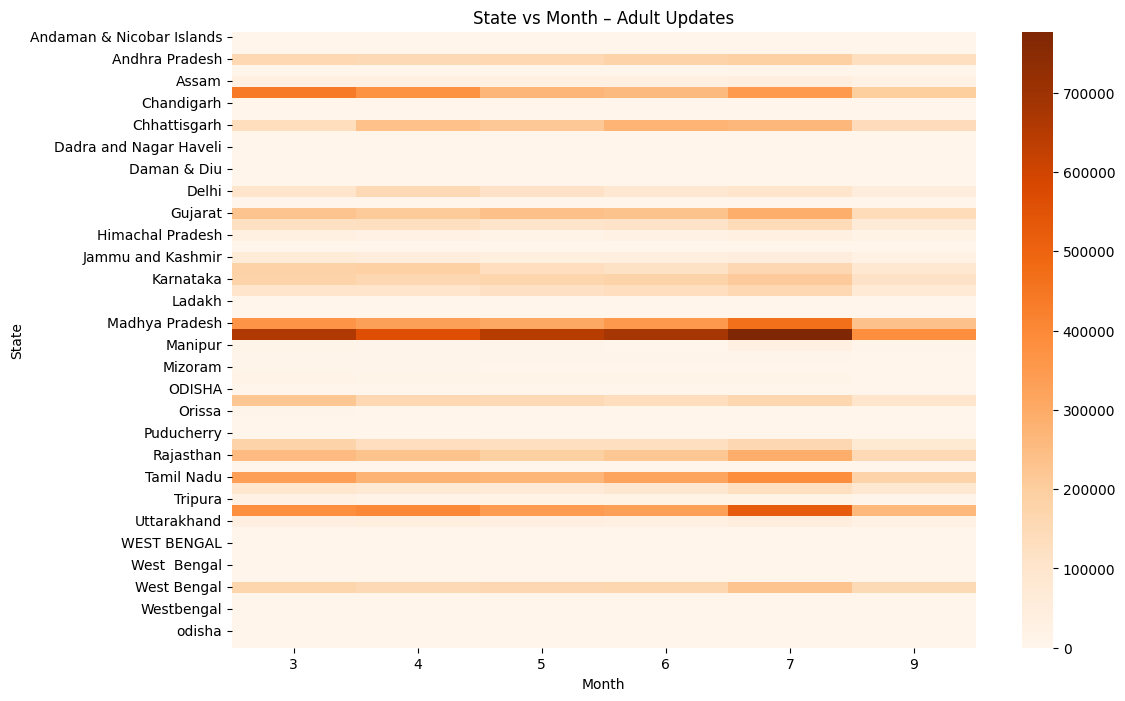

In [ ]:
state_month_adult = data.pivot_table(
    values='17+ Years of Age',
    index='State',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(12,8))
sns.heatmap(state_month_adult.fillna(0), cmap='Oranges')

plt.title("State vs Month – Adult Updates")
plt.ylabel("State")
plt.xlabel("Month")
plt.show()


In [ ]:
district_month = data.pivot_table(
    values='Total Updates',
    index='District',
    columns='Month',
    aggfunc='sum'
)

district_month.head()


Month,3,4,5,6,7,9
District,,,,,,
ANUGUL,56.0,59.0,32.0,36.0,NaN,13.0
Adilabad,12872.0,9333.0,10412.0,14734.0,17026.0,14233.0
Agar Malwa,1689.0,2148.0,2044.0,2488.0,2621.0,1266.0
Agra,24525.0,33549.0,28578.0,21073.0,39762.0,19531.0
Ahmadabad,774.0,1260.0,2835.0,1710.0,1075.0,2067.0


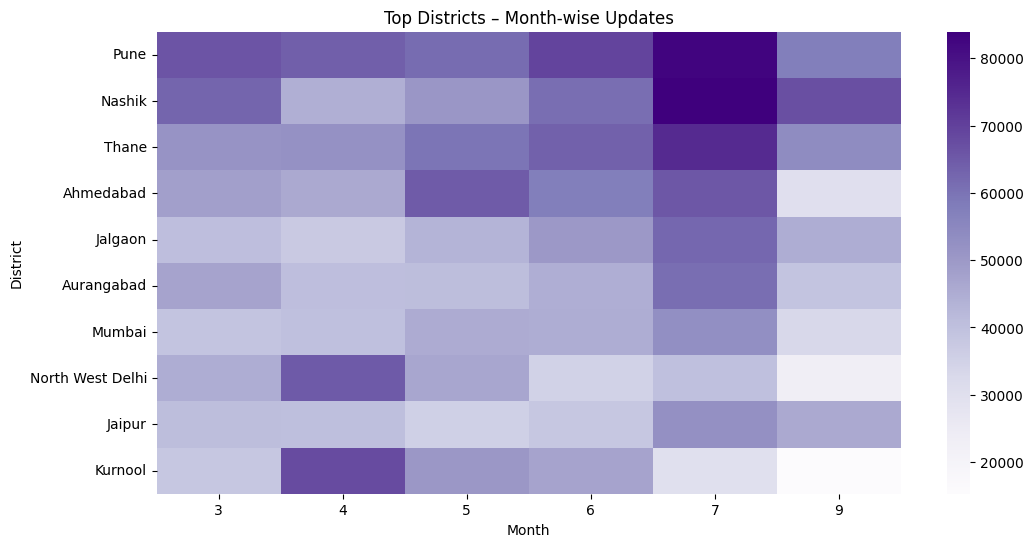

In [ ]:
top_districts = data.groupby('District')['Total Updates'].sum().nlargest(10).index

plt.figure(figsize=(12,6))
sns.heatmap(district_month.loc[top_districts], cmap='Purples')

plt.title("Top Districts – Month-wise Updates")
plt.xlabel("Month")
plt.ylabel("District")
plt.show()


In [ ]:
age_share = data.groupby(['State','Month'])[['5 to 17 Years of Age','17+ Years of Age']].sum()

age_share_percent = age_share.div(age_share.sum(axis=1), axis=0) * 100

age_share_percent.head(10)


5 to 17 Years of Age  17+ Years of Age
State                       Month                                        
Andaman & Nicobar Islands   3                  7.655502         92.344498
                            4                  9.239130         90.760870
                            5                 12.222222         87.777778
                            6                  7.857143         92.142857
                            7                  7.722008         92.277992
                            9                 23.298429         76.701571
Andaman and Nicobar Islands 3                 63.993585         36.006415
                            4                 63.007813         36.992188
                            5                 55.976676         44.023324
                            6                 46.230599         53.769401

INSIGHT 1 – AGE GROUP DISTRIBUTION

• A total of 48.58 million Aadhaar updates were analyzed for the year 2025.
• Adults (17+ years) account for 25.15 million updates, which is higher than children (5–17 years) with 23.43 million updates.
• Adult updates constitute approximately 51.8% of total updates, while child updates account for 48.2%.
• The relatively balanced distribution indicates that Aadhaar update services are equally relevant across both demographic groups.
• Slight dominance of adult updates suggests frequent changes such as address, mobile number, and biometric updates among working-age population.


INSIGHT 2 – GEOGRAPHIC CONCENTRATION

• Aadhaar update activity is highly concentrated in a few major states.
• Uttar Pradesh leads with 6.64 million updates, followed closely by Maharashtra with 6.00 million.
• Together, these two states alone contribute more than 26% of all updates in the dataset.
• Madhya Pradesh, Bihar, and Tamil Nadu also show very high update volumes, each exceeding 3 million updates.
• The dominance of large-population states indicates that update demand is strongly linked to demographic size and administrative reach.
• States like Karnataka and West Bengal, though populous, show comparatively lower updates, suggesting scope for increased outreach or service access.


INSIGHT 3 – TEMPORAL PATTERNS

• Aadhaar updates show clear monthly variations in 2025.
• July records the highest update activity with 9.79 million updates, making it the peak month.
• April follows as the second highest month with 8.64 million updates.
• September shows the lowest volume with 6.04 million updates.
• The spike in July may be associated with administrative deadlines, school admissions, or mid-year documentation requirements.
• The declining trend after July suggests seasonal or event-driven update behavior.
• Such patterns can be used by UIDAI to plan staffing and infrastructure ahead of high-demand months.


INSIGHT 4 – AGE BEHAVIOUR ACROSS STATES

• Analysis of state-wise age distribution shows that most high-volume states display a balanced mix of child and adult updates.
• However, certain states show relatively higher child updates, indicating school-related Aadhaar usage.
• Other states demonstrate adult-dominant updates, possibly due to migration and address changes.
• These differences highlight that Aadhaar usage patterns vary regionally based on socio-economic factors.


INSIGHT 5 – OPERATIONAL IMPLICATIONS

• Peak demand months (April and July) require additional Aadhaar service capacity.
• High-volume states like Uttar Pradesh and Maharashtra may benefit from:
   – Additional enrolment centres
   – Temporary staffing during peak periods
• States with comparatively lower update numbers could be targeted for:
   – Awareness campaigns
   – Improved service accessibility
• The near-equal split between age groups indicates the need for both school-oriented and adult-oriented service strategies.


LIMITATIONS

• The dataset represents Aadhaar update data only for the year 2025; multi-year trend analysis was not possible.
• Data is limited to update counts and does not include reasons for updates.
• Demographic attributes are restricted only to two broad age groups.
• Insights are based on aggregated counts without individual-level details.


CONCLUSION

This analysis successfully identified meaningful patterns and trends in Aadhaar updates across geography, time, and age groups for the year 2025.  
The findings highlight significant regional disparities, clear monthly seasonality, and balanced demographic participation.  
These insights can assist UIDAI in resource planning, targeted awareness programs, and improved service delivery for citizens.
